# **DA Módulo 3: Ejercicio de evaluación final**


## Fase 1: Exploración y Limpieza

### 1. Exploración Inicial:


Configuración inicial y carga de datos:

```python

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np 

In [2]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Lectura de archivos CSV y transformación a DataFrame (df)
df_fa = pd.read_csv("Customer Flight Activity.csv", index_col = 0)
df_lh = pd.read_csv("Customer Loyalty History.csv", index_col = 0)

In [4]:
df_fa.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_lh.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


Exploratory Data Analysis (EDA): 
- identificación de patrones y tendencias
- detección de valores nulos, atípicos o faltantes
- visualización de estadísticas básicas

In [6]:
# Exploratory Data Analysis (EDA):
# Examinar y visualizar los datos de manera sistemática con el objetivo de descubrir patrones,
# identificar tendencias, detectar valores atípicos y extraer información relevante.

def eda_basico(df):
    print("🔍 Primeras filas del DataFrame:")
    display(df.head())
    print("📐 Dimensiones:")
    print(df.shape , "\n")
    print("🧠 Información general:")
    display(df.info())
    print('🌑Nombre de las columnas:')
    display(df.columns)
    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print("📉 Descripción de columnas numéricas:")
    display(df.describe())
    print("🔤 Descripción de columnas categóricas:")
    if any(df.dtypes == 'O'):
        display(df.describe(include=['O']))
    print("🚫 Valores nulos por columna:")
    display(df.isnull().sum())
    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")

In [7]:
eda_basico(df_fa)

🔍 Primeras filas del DataFrame:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


📐 Dimensiones:
(405624, 9) 

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


None

🌑Nombre de las columnas:


Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

📊 Tipos de datos por columna:
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object 

📉 Descripción de columnas numéricas:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


🔤 Descripción de columnas categóricas:
🚫 Valores nulos por columna:


Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

📎 Filas duplicadas:
Duplicadas: 228705
Ejemplo de duplicados:
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100272          2017      1               0                        0   
100301          2017      1               0                        0   
100364          2017      1               0                        0   
100380          2017      1               0                        0   
100504          2017      1               0                        0   

                Total Flights  Distance  Points Accumulated  Points Redeemed  \
Loyalty Number                                                                 
100272                      0         0                 0.0                0   
100301                      0         0                 0.0                0   
100364                      0         0                 0.0                0   
100380                      0    

In [8]:
eda_basico(df_lh)

🔍 Primeras filas del DataFrame:


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


📐 Dimensiones:
(16737, 15) 

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtype

None

🌑Nombre de las columnas:


Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

📊 Tipos de datos por columna:
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object 

📉 Descripción de columnas numéricas:


,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


🔤 Descripción de columnas categóricas:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


🚫 Valores nulos por columna:


Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

📎 Filas duplicadas:
Duplicadas: 0
No hay filas duplicadas.



Unión del conjunto de datos en un mismo df, seleccionamos el tipo de unión que mejor corresponde:

In [9]:
# Unión de ambos df por el índice conservando todas las filas de ambos (outer)
df= df_fa.join(df_lh, how='outer')

### 2. Limpieza de Datos:
```python

In [10]:
eda_basico(df)

🔍 Primeras filas del DataFrame:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


📐 Dimensiones:
(405624, 24) 

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
 9   Country                      405624 non-null  object 
 10  Province                     405624 non-null  object 
 11  City                         405624 non-null  object 
 12  Posta

None

🌑Nombre de las columnas:


Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

📊 Tipos de datos por columna:
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object 

📉 Descripción de c

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


🔤 Descripción de columnas categóricas:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,405624,405624,405624,405624,405624,405624,405624,405624,405624
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,405624,130896,81096,21984,203640,253752,235800,184224,382200


🚫 Valores nulos por columna:


Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

📎 Filas duplicadas:
Duplicadas: 1864
Ejemplo de duplicados:
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
101902          2017      1               0                        0   
101902          2017      2               0                        0   
101902          2017      3               0                        0   
101902          2017      7               0                        0   
101902          2017     12               0                        0   

                Total Flights  Distance  Points Accumulated  Points Redeemed  \
Loyalty Number                                                                 
101902                      0         0                 0.0                0   
101902                      0         0                 0.0                0   
101902                      0         0                 0.0                0   
101902                      0      

Eliminar o tratar los valores nulos.


In [11]:
# Mostramos el % de nulos por columna:
((df.isnull().sum()/len(df))*100).round()

Year                            0.0
Month                           0.0
Flights Booked                  0.0
Flights with Companions         0.0
Total Flights                   0.0
Distance                        0.0
Points Accumulated              0.0
Points Redeemed                 0.0
Dollar Cost Points Redeemed     0.0
Country                         0.0
Province                        0.0
City                            0.0
Postal Code                     0.0
Gender                          0.0
Education                       0.0
Salary                         25.0
Marital Status                  0.0
Loyalty Card                    0.0
CLV                             0.0
Enrollment Type                 0.0
Enrollment Year                 0.0
Enrollment Month                0.0
Cancellation Year              88.0
Cancellation Month             88.0
dtype: float64

In [12]:
# Las columnas Cancellation Year y Cancellation Month tienen un 88% de nulos: las eliminiamos.
df= df.drop(columns=['Cancellation Year','Cancellation Month'])

In [13]:
# Imputamos los nulos de la columna Salary con la mediana porque la distribución es asimétrica:
# Paso previo: 
df['Salary']= df['Salary'].abs()

# Imputación:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [14]:
df['Salary'].describe()

count    405624.000000
mean      77887.407964
std       30129.005589
min        9081.000000
25%       63899.000000
50%       73479.000000
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64

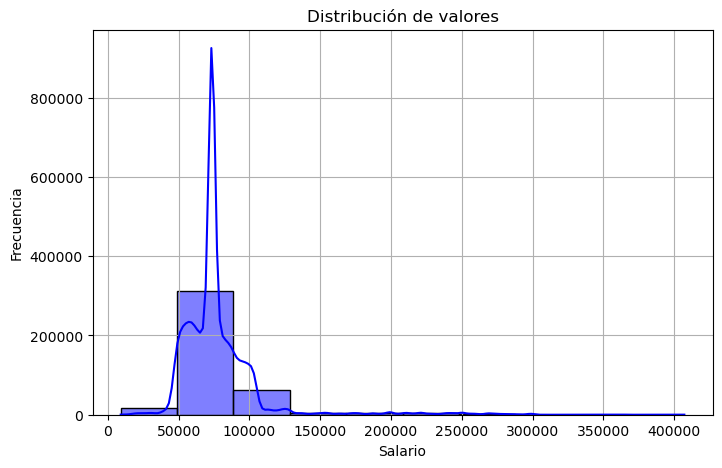

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=10, kde=True, color='b')

plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores')
plt.grid(True)

# Mostrar gráfico
plt.show()


In [16]:
df['Salary'].isnull().sum()

0


Verificar la consistencia y corrección de los datos para asegurar que los datos se
presenten de forma coherente.


In [17]:
# Eliminamos las filas duplicadas:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
# La columna Salary tiene valores negativos, los pasamos a positivos:
df['Salary']= df['Salary'].abs()


Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.


In [19]:
# Pasar las columnas Enrollment Year y Enrollment Month a object:
df[['Enrollment Year','Enrollment Month']]= df[['Enrollment Year','Enrollment Month']].astype(object)

In [20]:
df.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                 object
Enrollment Month                object
dtype: object

In [21]:
# Pasar la columna Salary a de float a int:
df['Salary']=df['Salary'].astype(int)

## Fase 2: Visualización


In [22]:
# Importamos librerías de visualización:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


Anáisis multivariable de 3 variables numéricas: Year, Month y Flights booked: usamos un gráfico de líneas (lineplot)

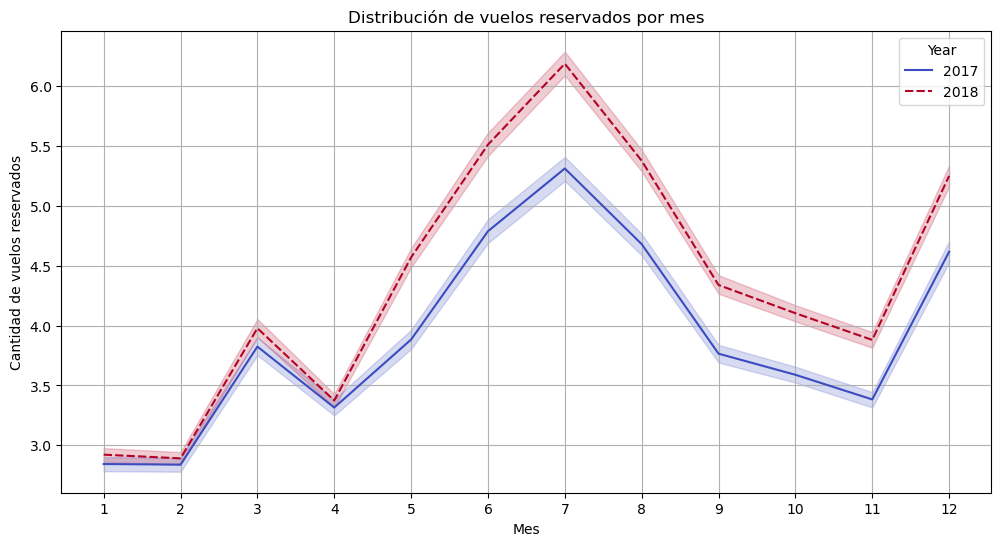

In [23]:
# Gráfico de dispersión
plt.figure(figsize=(12,6))
sns.lineplot( data=df, x='Month', y='Flights Booked', hue='Year', style='Year', palette='coolwarm')

plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Distribución de vuelos reservados por mes')
plt.grid(True)
plt.xticks(np.arange(df['Month'].min(), df['Month'].max() + 1, 1)) # Establece los valores del eje X con un intervalo de 1 (todos los enteros).

# Mostrar gráfico
plt.show()

#### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


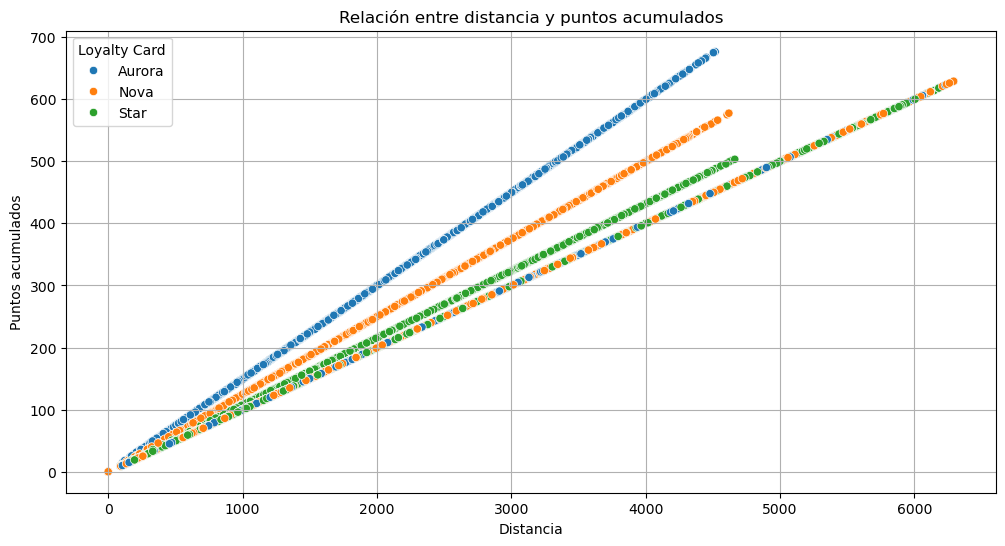

In [24]:

# Gráfico de dispersión
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated',hue='Loyalty Card')

plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.title('Relación entre distancia y puntos acumulados')
plt.grid(True)

# Mostrar gráfico
plt.show()

#### 3. ¿Cuál es la distribución de los clientes por provincia o estado?


Análisis univariable: Usamos un gráfico de barras (barplot) para visualizar la distribución de los clientes por provincia o estado.

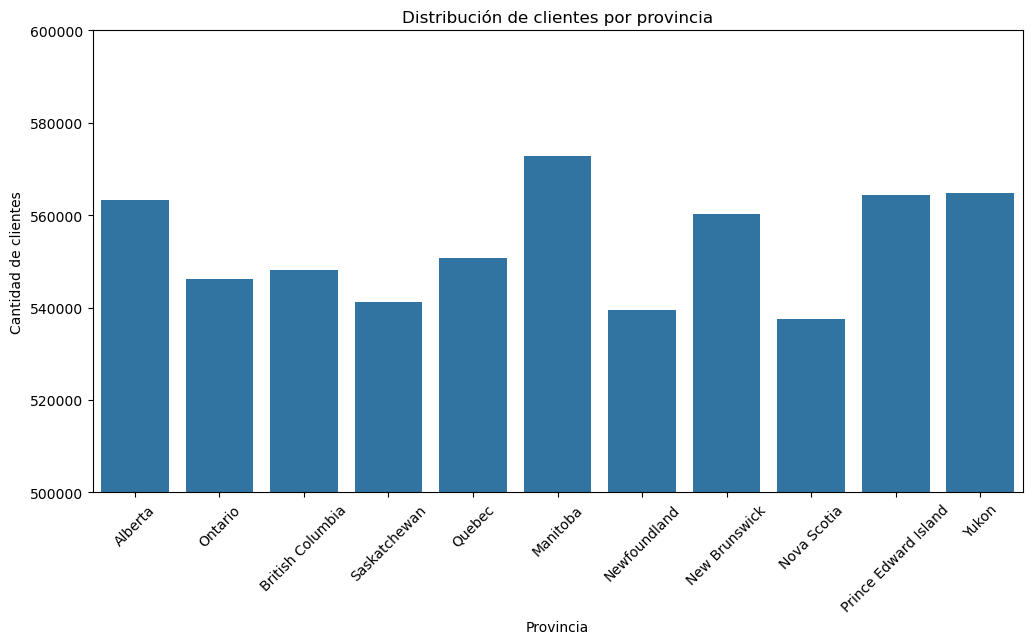

In [25]:

# Crear gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Province', y='Loyalty Number', errorbar=None) # Uso el parámetro errorbar para que no ver la raya negra del intervalo de confianza.

plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes por provincia')
plt.xticks(rotation=45)
plt.ylim(500000, 600000) 

# Mostrar gráfico
plt.show()

#### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


Análisis bivariable con una columna categórica (Education) y una numérica (Salary): Usamos un barplot para comparar el salario promedio entre los diferentes niveles educativos de los clientes.

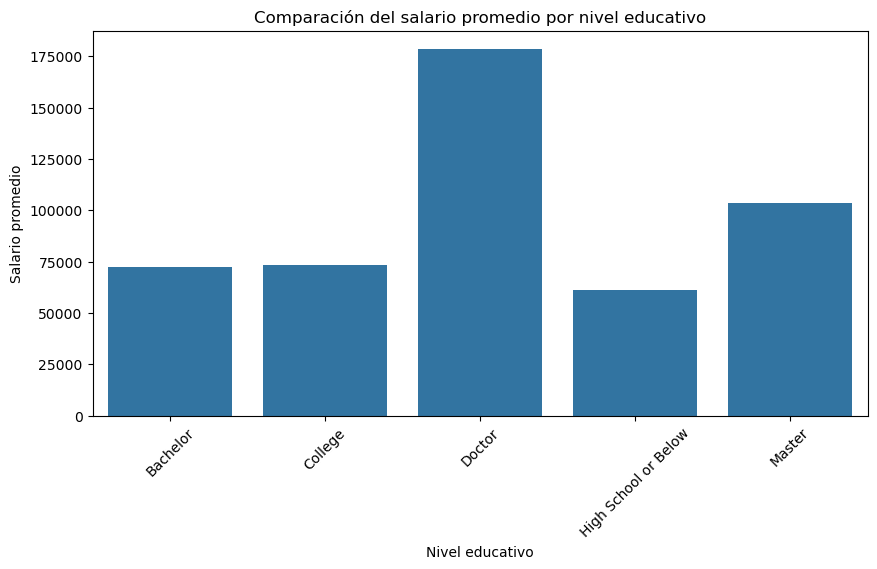

In [26]:
# Agrupamos el df según la media de salario de los distintos niveles educativos:
df_grouped = df.groupby('Education')['Salary'].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=df_grouped, x='Education', y='Salary')

plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.title('Comparación del salario promedio por nivel educativo')
plt.xticks(rotation=45)


plt.show()

#### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


Análisis univariable: Usamos un gráfico de pastel (pie chart) para visualizar la proporción de clientes con diferentes tipos de tarjetas de fidelidad.

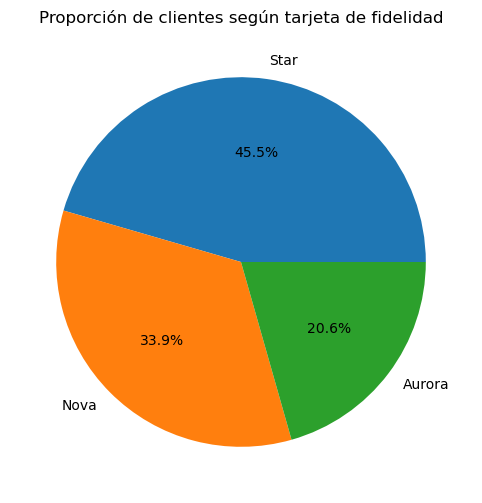

In [27]:

df_grouped = df['Loyalty Card'].value_counts(normalize=True) * 100  # Obtener porcentaje

# Crear gráfico de pastel
plt.figure(figsize=(8,6))
df_grouped.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proporción de clientes según tarjeta de fidelidad')
plt.ylabel('')  # Ocultar etiqueta del eje Y

plt.show()

#### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?


Análisis bivariable de 2 columnas categóricas: usamos un gráfico de barras agrupadas.

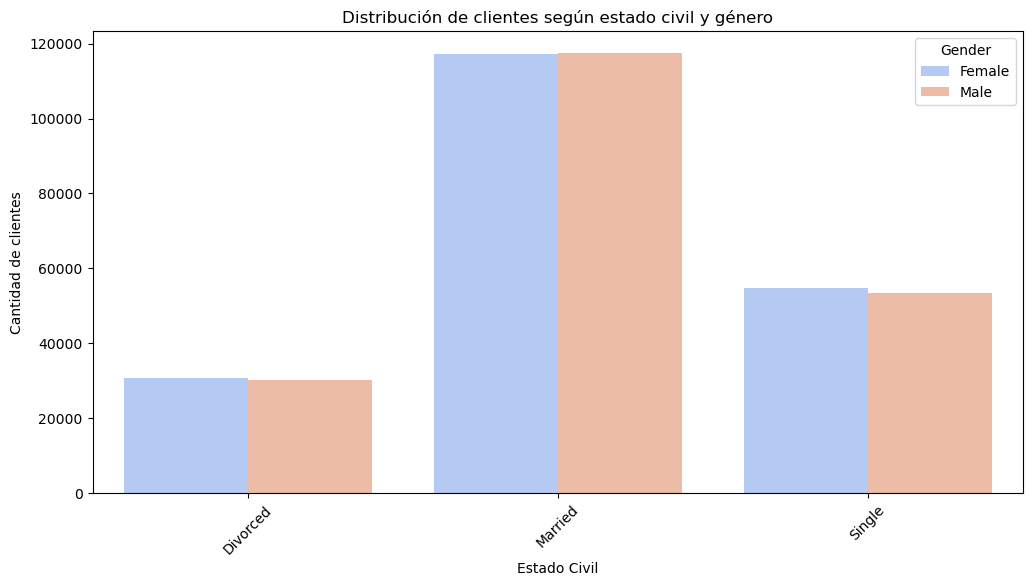

In [28]:
df1=df.reset_index()
df_grouped = df1.groupby(['Marital Status', 'Gender'])['Loyalty Number'].count().reset_index()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12,6))
sns.barplot(data=df_grouped, x='Marital Status', y='Loyalty Number', hue='Gender', palette='coolwarm')

plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según estado civil y género')
plt.xticks(rotation=45)


plt.show()